In [2]:
import os

In [3]:
data_dir = 'C:/Users/yashk/Downloads/cell_images'

In [4]:
os.listdir(data_dir)

['test', 'train']

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
from matplotlib.image import imread

In [7]:
test_path = data_dir + '/test/'
train_path = data_dir + '/train/'

In [8]:
test_path

'C:/Users/yashk/Downloads/cell_images/test/'

In [9]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [10]:
os.listdir(train_path+'parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [11]:
para_cell = train_path+'parasitized/'+'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [12]:
para_cell

'C:/Users/yashk/Downloads/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [13]:
imread(para_cell).shape

(148, 142, 3)

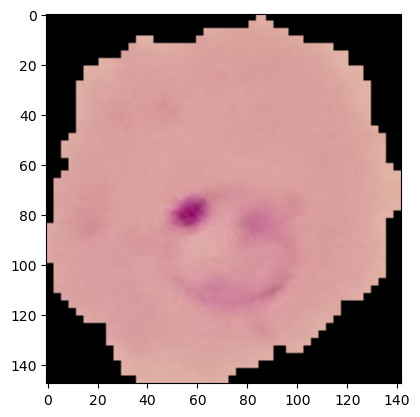

In [14]:
plt.imshow(imread(para_cell))

In [15]:
os.listdir(test_path+'uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_34.png'

In [16]:
unif_cell = test_path+'uninfected/'+'C100P61ThinF_IMG_20150918_144104_cell_34.png'

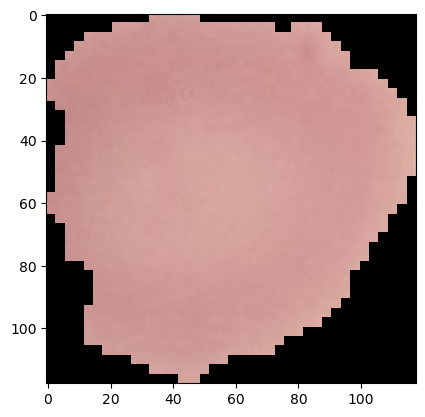

In [17]:
plt.imshow(imread(unif_cell))

In [18]:
pwd


'C:\\Users\\yashk\\AI work\\TF_2_Notebooks_and_Data\\04-CNNs'

In [19]:
len(os.listdir(train_path+'parasitized'))

12480

In [20]:
len(os.listdir(train_path+'uninfected'))

12480

In [21]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
    img = imread(test_path+'uninfected\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

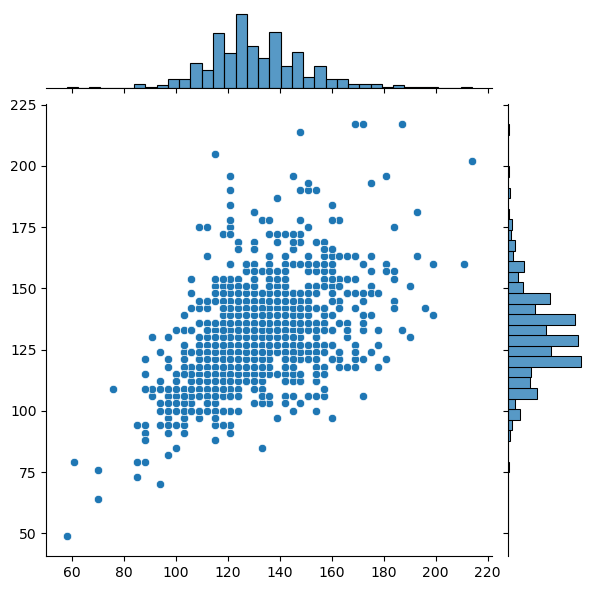

In [22]:
sns.jointplot(x=dim1,y=dim2)

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

In [25]:
image_shape=(130,130,3)

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range=20,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.1,
                               zoom_range=0.1,
                               horizontal_flip=True,
                               fill_mode='nearest')

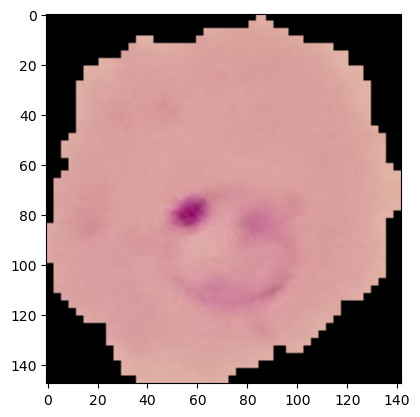

In [28]:
plt.imshow(imread(para_cell))

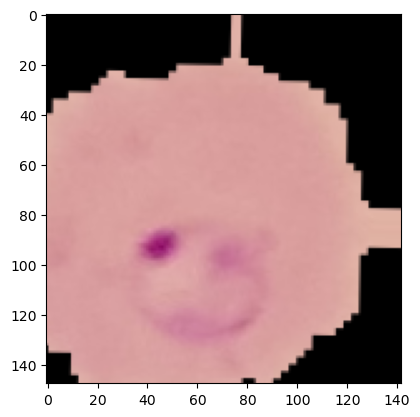

In [29]:
para_img = imread(para_cell)
plt.imshow(image_gen.random_transform(para_img))

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout,Flatten




In [31]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=image_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics = 'accuracy')


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
early_stop = EarlyStopping(monitor='val_loss',patience = 2)

In [35]:
batch_size=16

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=(130,130),
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')


Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                                target_size=(130,130),
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary',
                                               shuffle=False)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
results = model.fit(train_image_gen,
                              epochs=20,
                              validation_data=test_image_gen,
                              callbacks=[early_stop])

Epoch 1/20
  92/1560 [>.............................] - ETA: 7:40 - loss: 2.6634 - accuracy: 0.5061

KeyboardInterrupt: 

In [42]:
from tensorflow.keras.models import load_model

In [44]:
model = load_model('malaria_detector.h5')

In [47]:
model.evaluate(test_image_gen)

163/163 [==============================] - 17s 102ms/step - loss: 36.3166 - accuracy: 0.8662


[36.31662368774414, 0.8661538362503052]

In [48]:
model.metrics_names


['loss', 'accuracy']

In [51]:
pred =model.predict(test_image_gen)

163/163 [==============================] - 16s 100ms/step


In [52]:
predictions = pred >0.5

In [53]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

In [54]:
pred

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [0.]], dtype=float32)

In [55]:
len(pred)

2600

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      1300
           1       0.98      0.75      0.85      1300

    accuracy                           0.87      2600
   macro avg       0.89      0.87      0.86      2600
weighted avg       0.89      0.87      0.86      2600



In [60]:
confusion_matrix(test_image_gen.classes,predictions)

array([[1277,   23],
       [ 325,  975]], dtype=int64)

In [62]:
para_cell

'C:/Users/yashk/Downloads/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [63]:
from tensorflow.keras.preprocessing import image

In [73]:
my_image = image.load_img(para_cell,target_size=image_shape)

In [74]:
my_img_arr = image.img_to_array(my_image)

In [76]:
my_img_arr.shape


(130, 130, 3)

In [78]:
my_img_arr=np.expand_dims(my_img_arr,axis=0)

In [79]:
my_img_arr.shape

(1, 130, 130, 3)

In [80]:
model.predict(my_img_arr)

1/1 [==============================] - 0s 108ms/step


array([[0.]], dtype=float32)